# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from AiyagariModel import AiygariModelClass

# Setup

In [2]:
model = AiygariModelClass(name='baseline')

In [3]:
model_alt = model.copy(name='alt')
model_alt.par.sigma_psi *= 1.1 

# Solve

In [4]:
models = [model,model_alt]
for model_ in models:
    
    print(f'###')
    print(f'### {model_.name}')
    print(f'###\n')
    
    model_.find_ss(do_print=True)
    print('')
    model_.compute_jacs(do_print=True)
    print('')
    model_.find_transition_path(do_print=True)
    print('')
    

###
### baseline
###

household problem in ss solved in 6.5 secs [1758 iterations]
household problem in ss simulated in 4.9 secs [3052 iterations]

Implied K = 12.509
Implied Y =  1.562
Implied Gamma =  0.629
Implied delta =  0.035
Implied K/Y =  8.006
Discrepancy in K-A_hh =   0.00000000
Discrepancy in C-C_hh =   0.00000000

household Jacobians:
inputname = ghost: household Jacobian computed in 7.5 secs
inputname = r: household Jacobian computed in 0.5 secs
inputname = w: household Jacobian computed in 0.5 secs
all Jacobians computed in 8.5 secs

full Jacobians:
full Jacobian to unknowns computed in 5.1 secs [in evaluate_path(): 5.0 secs]
full Jacobian to shocks computed in 0.2 secs [in evaluate_path(): 0.1 secs]

finding the transition path:
 it =   0 -> max. abs. error =  1.1e-01
 it =   1 -> max. abs. error =  1.6e-04
 it =   2 -> max. abs. error =  5.0e-07
 it =   3 -> max. abs. error =  4.0e-10
 it =   4 -> max. abs. error =  4.8e-13

transition path found in 5.7 secs

###
### al

# IRFs

### shocks ###


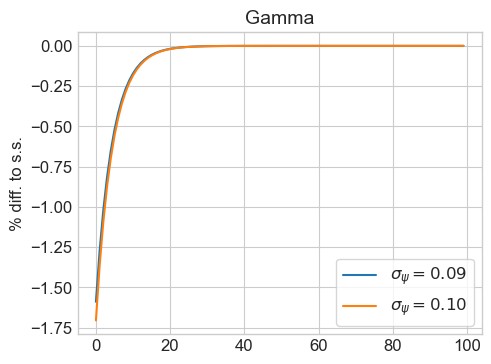


### varnames ###


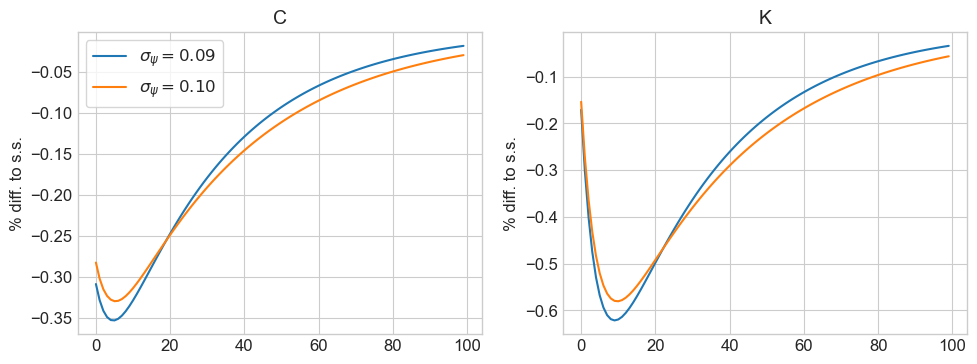


### tagets ###


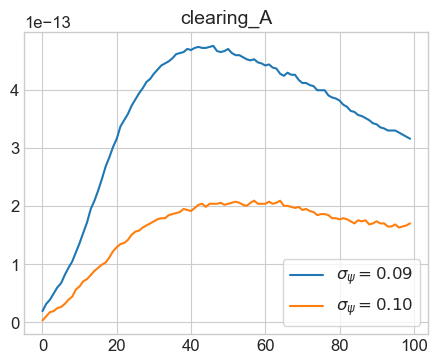

In [5]:
models = [model,model_alt]
labels = [fr'$\sigma_{{\psi}} = {model_.par.sigma_psi:.2f}$' for model_ in models]
paths = ['C','K']
model.compare_IRFs(models,labels,paths,T_max=100)